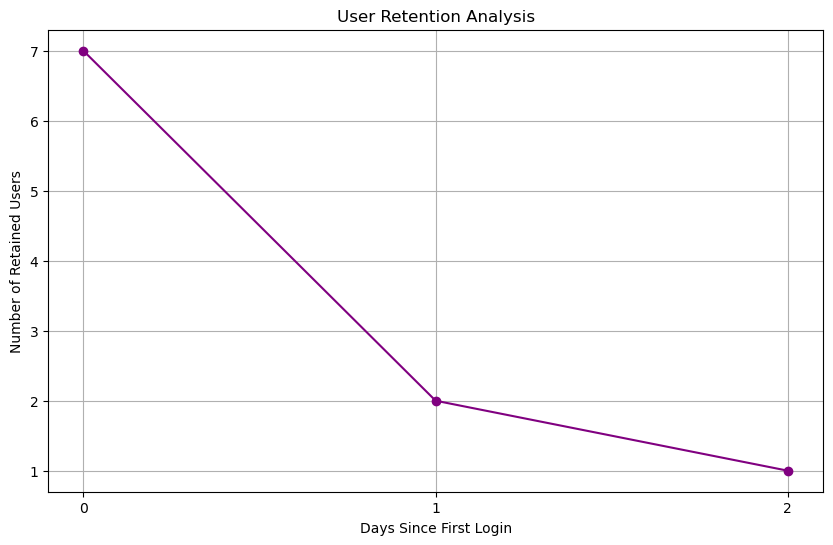

Retention Analysis Insights:
------------------------------
retention_days
0    7
1    2
2    1
Name: user_id, dtype: int64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample user login data (replace with actual data)
data = {
    "user_id": [1, 2, 3, 4, 5, 1, 2, 3, 6, 7],
    "login_date": [
        "2025-01-01", "2025-01-01", "2025-01-01", "2025-01-01", "2025-01-01",
        "2025-01-02", "2025-01-02", "2025-01-03", "2025-01-03", "2025-01-04"
    ],
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Convert 'login_date' to datetime
df['login_date'] = pd.to_datetime(df['login_date'])

# Get the first login date for each user
first_login = df.groupby('user_id')['login_date'].min().reset_index()
first_login.rename(columns={'login_date': 'first_login_date'}, inplace=True)

# Merge first login data with original DataFrame
df = pd.merge(df, first_login, on='user_id')

# Calculate retention days (days since first login)
df['retention_days'] = (df['login_date'] - df['first_login_date']).dt.days

# Calculate retention counts
retention_counts = df.groupby('retention_days')['user_id'].nunique()

# Visualization: Retention rate over days
plt.figure(figsize=(10, 6))
retention_counts.plot(kind='line', marker='o', color='purple')
plt.title("User Retention Analysis")
plt.xlabel("Days Since First Login")
plt.ylabel("Number of Retained Users")
plt.grid()
plt.xticks(range(0, retention_counts.index.max() + 1))
plt.show()

# Print insights
print("Retention Analysis Insights:")
print("-" * 30)
print(retention_counts)
